# PUI final exam 2021

## Theoretic part

## Question 1. 
Imagine training a model that considers multiple street segments and aims to predict the traffic based on the known characteristics of the street segments. Some of the street segments from the training sample have the observed amount of traffic specified for them, others do not. How would you classify this problem from the Machine Learning perspective?

A. Supervised learning;

B. Unsupervised learning;

C. Semi-supervised learning;

D. Reinforcement learning.

Explain your choice:

### C. Semi-supervised learning

### Because some of the training data is not labeled, we would use a semi supervised learning model that learns from the labeled data and uses the unlabeled training data to understand the data better 

## Question 2. 
Regression $y\sim a_1 x_1 + a_2 x_2 +a_3 x_3$ have p-value of $0.03$ for $x_1$, $0.3$ for $x_2$ and $0.15$ for $x_3$. Does it mean that (select all that apply):

A. Impact of $x_3$ is twice stronger than impact of $x_2$.

B. Regressors $x_2$ and $x_3$ are irrelevant.

C. One could reject the null-hypothesis $a_j=0$ only for $j=1$ but not for $j=2$ and $j=3$ at 95% singificance level.

D. The estimated value of $a_1$ is statistically significant.

E. 95%-confidence indervals for $a_2$ and $a_3$ should contain zero. 

### B, C, D, E

## Question 3. 
Which of the following statements (select all that apply) are true about overfitting problem for linear regression:

A. Overfitting problem could be detected by R-squared if the in-sample R-squared
is very low.

B. Overfitting problem often happens when we do not have enough features but a big
number of observations.

C. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is very low.

D. Overfitting problem could happen when we have many noisy features but a
small number of observations.

E. Overfitting problem could be detected by R-squared if the out-of-sample R-
squared is considerably lower compared to in-sample R-squared.

Explain how do you understand the concept of overfitting in general and in the context of your answer.

#### D, E

#### Overfitting in linear regression happens when the model has been trained with too many features that are very specific to the quirks of the training dataset, so that it is not able to generalize the learnings well for an external dataset. This could be caused if the training data does not represent the overall data well and is too small to learn from. This would cause the model to fit the training sample well, so give a high R-squared, but when it is tested on out-of-sample data, it would give a poor R-squared comparitively.  

## Question 4. 
You trained the regression model with 100 regressors and 1000 observations in the training and another 1000 in the test sample. You found that in-sample R2 over the training sample is 70\% and the out-of-sample R2 over the test sample only - 30\%. (select all that apply)

a) Do you think there is any problem and how would you characterize it? Can adding more regressors (if you have them) help the model?

b) Which approaches you may use to solve the problem? 

c) What would you expect the in-sample R2 to increase or decrease after that? What about the out-of-sample (test) R2?

#### a) I think there is could be an overfitting problem here. Adding more regressors would not help the model since it is already too specific to the training model

#### b) We will have to train the model on lesser number of regressors (remove noisy regressors by checking correlation between regressors, or techniques like chi-squared test, feature selection). Do cross -validation or take out a sample data from the training data to validate as out-of-sample data instead, before testing on actual test data

#### c) I would expect in-sample R2 to decrease because we are reducing the in-sample accuracy of the model, however I would expect the out-of-sample R2 to increase after we have solved for overfitting

In [263]:
# import packages
import numpy as np
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats

import seaborn as sns #for styling the plots


# suppress warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Traffic Modeling for Real-Time Autonomous Vehicle Solutions in LGA

Transportation network models are essential to transportation operations and planning. A simple yet well-designed linear model can provide us insights into the traffic demand. We are going to model the outgoing traffic around LGA, one of the busiest transportation hubs in NYC. 
In this test, you'll be asked to:
* Find possible correlations from observations
* Incorporate time patterns using dummy variables
* Run and diagnose linear models, in-sample and out-of-sample. Perform feature selection
* Cluster the days based on their ridership patterns to see if we can detect any outliers

We will be importing the dataset `LGAVehicleByHour.csv`,`LGAFlightArrival` providing FHV and taxi ridership and arrivals at the airport aggregated on the hourly basis:
* `vehicle_count`: Number of FHV (For Hire Vehicle) and taxi departing from LGA. This is our target variable.
* `arrivals`: Number of incoming domestic flights arriving LGA, which is assumed to provide a basis for future FHV and taxi demand

In [264]:
# import and curate the dataset
TaxiRidership = pd.read_csv("/home/jovyan/shared/Data/LGAVehicleByHour.csv")
FlightArrival = pd.read_csv("/home/jovyan/shared/Data/LGAFlightArrival.csv")

In [265]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count
0,1,2018-01-01 00:00,0.0
1,2,2018-01-01 00:00,0.0
2,3,2018-01-01 00:00,0.0
3,4,2018-01-01 00:00,0.0
4,5,2018-01-01 00:00,0.0


In [266]:
FlightArrival.head()

,Date,arrivals
0,18/1/1 0:00,3
1,18/1/1 1:00,0
2,18/1/1 2:00,1
3,18/1/1 3:00,0
4,18/1/1 4:00,0


In [267]:
# convert the `date` feature into `dt.datetime` format. This is for later creating dummy variables
TaxiRidership.Date = pd.to_datetime(TaxiRidership.Date)
FlightArrival.Date = pd.to_datetime(FlightArrival.Date, format='%y/%m/%d %H:%M')

In [268]:
#get day of the week; monday - 0, sunday - 6
TaxiRidership['DOW']=pd.DatetimeIndex(TaxiRidership.Date).weekday

In [269]:
#get day from beginning of the year, hour and day of the week from datetime
TaxiRidership['Hour']=pd.DatetimeIndex(TaxiRidership.Date).hour

In [270]:
#get day from beginning of the year
TaxiRidership['day']=((TaxiRidership.Date-dt.datetime(2018,1,1))/dt.timedelta(days = 1)).astype(int)

In [271]:
TaxiRidership

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01 00:00:00,0.0,0,0,0
1,2,2018-01-01 00:00:00,0.0,0,0,0
2,3,2018-01-01 00:00:00,0.0,0,0,0
3,4,2018-01-01 00:00:00,0.0,0,0,0
4,5,2018-01-01 00:00:00,0.0,0,0,0
...,...,...,...,...,...,...
2251315,259,2018-12-31 23:00:00,2.0,0,23,364
2251316,260,2018-12-31 23:00:00,3.0,0,23,364
2251317,261,2018-12-31 23:00:00,1.0,0,23,364
2251318,262,2018-12-31 23:00:00,8.0,0,23,364


In [272]:
# group dataset by rides on each day of week

TaxiRidership_dow = TaxiRidership[['DOLocationID','vehicle_count','DOW']].groupby(by = ['DOLocationID','DOW'],as_index = False).sum()
TaxiRidership_dow.head()

,DOLocationID,DOW,vehicle_count
0,1,0,1049.0
1,1,1,1020.0
2,1,2,969.0
3,1,3,1009.0
4,1,4,1294.0


## Task 1. Spatial visualization

### Q1(5+5pts extra credits) Spatial distribution of total ridership from LGA on each day of week. Using colormap 'RdBu_r', bonus on if you plot 7 plots on the same colormap scale.

In [273]:
#upload the shapefile; The 'location_i' column consists of all taxi zones within NYC + Newark airport
taxi = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/d3c5-ddgc?method=export&format=Shapefile')
taxi.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [274]:
# merge with LGA taxi pickup dataset

tripsViz = taxi.merge(TaxiRidership_dow, left_on='location_i', right_on='DOLocationID')
tripsViz.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry,DOLocationID,DOW,vehicle_count
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,0,1049.0
1,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,1,1020.0
2,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,2,969.0
3,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,3,1009.0
4,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695...",1,4,1294.0


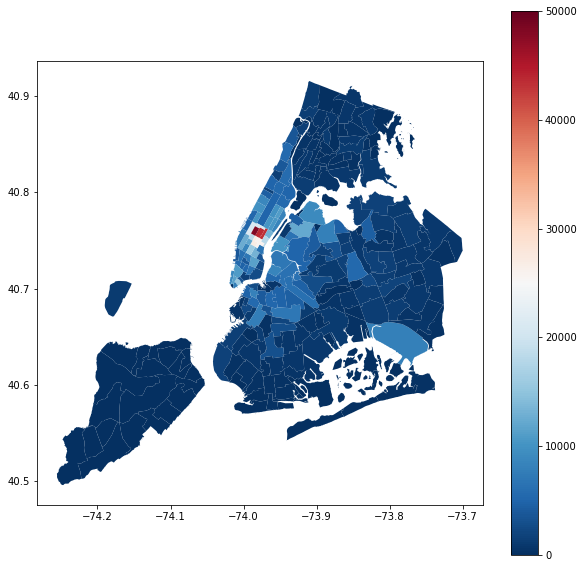

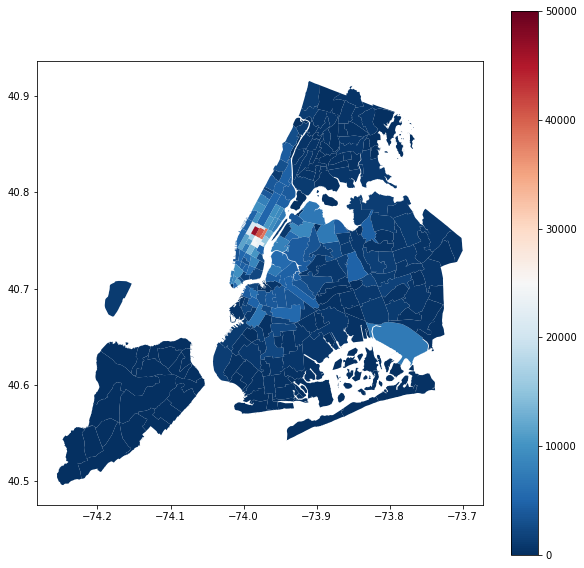

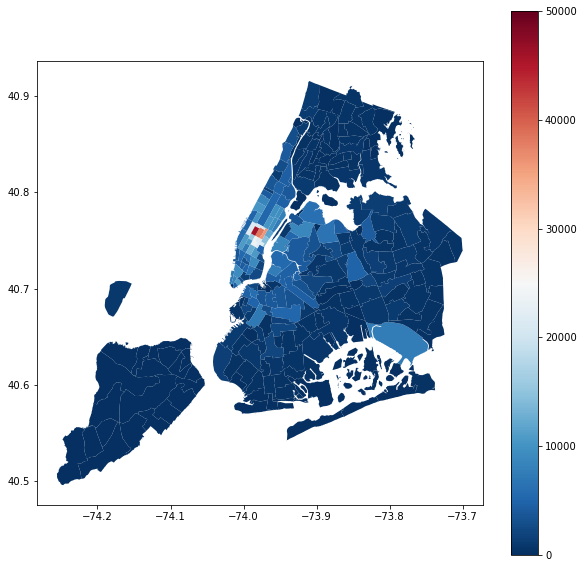

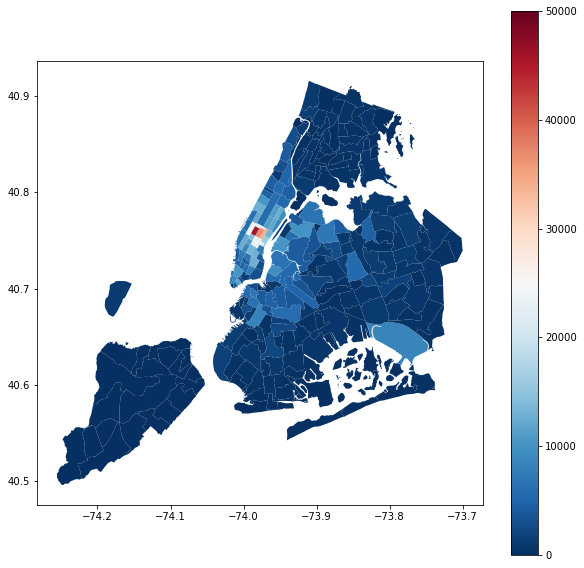

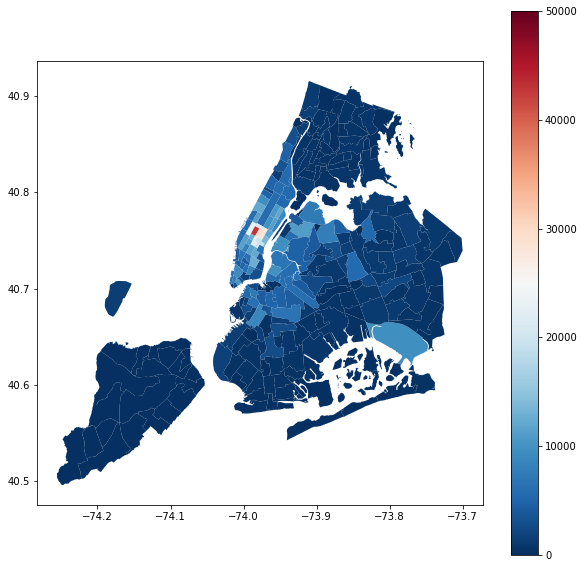

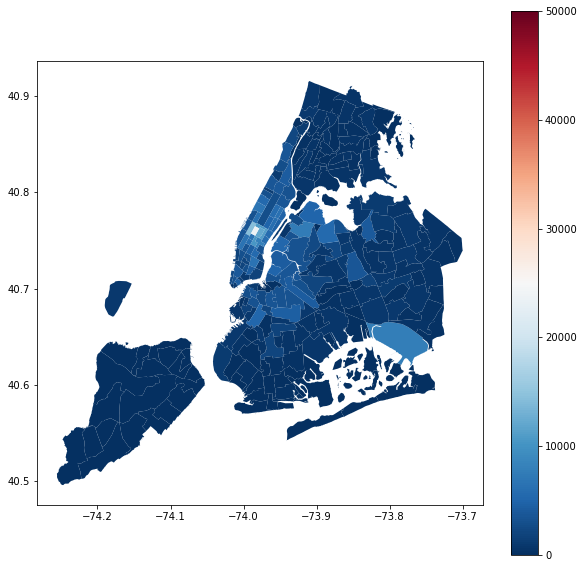

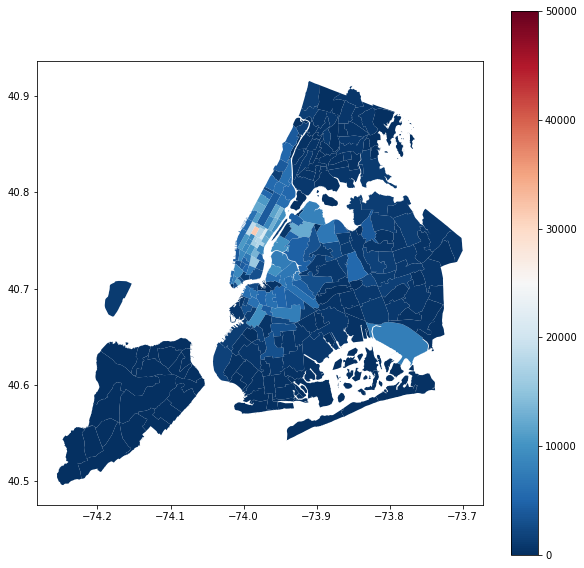

In [275]:
dow = [0,1,2,3,4,5,6]
for i in dow:
    fig, ax = plt.subplots(1, figsize=(10,10))
    tripsViz[tripsViz['DOW'] == i].plot(ax=ax, column='vehicle_count',cmap = 'RdBu_r',
                                        legend=True,vmin = 0,vmax = 50000) #adding limit to get all the graphs in same scale


## Task 2: Data preprocessing

### Q1 (3pts), aggregate ridership to date-hour level (over the entire city for all the drop off locations aggregated together), merge with the flight arrival data

In [276]:
# aggregate ridership data at date-hour level
TaxiRidership_hour = TaxiRidership[['Date','vehicle_count','Hour','DOW','day']].groupby(by = ['Date','Hour','DOW','day'],as_index = False).sum()
TaxiRidership_hour.head()


,Date,Hour,DOW,day,vehicle_count
0,2018-01-01 00:00:00,0,0,0,142.0
1,2018-01-01 01:00:00,1,0,0,23.0
2,2018-01-01 02:00:00,2,0,0,2.0
3,2018-01-01 03:00:00,3,0,0,1.0
4,2018-01-01 04:00:00,4,0,0,13.0


In [277]:
# len(FlightArrival),len(FlightArrival.Date.unique())

flight_and_taxi = FlightArrival.merge(TaxiRidership_hour,left_on = 'Date', right_on = 'Date',how = 'left')
flight_and_taxi.head()

,Date,arrivals,Hour,DOW,day,vehicle_count
0,2018-01-01 00:00:00,3,0,0,0,142.0
1,2018-01-01 01:00:00,0,1,0,0,23.0
2,2018-01-01 02:00:00,1,2,0,0,2.0
3,2018-01-01 03:00:00,0,3,0,0,1.0
4,2018-01-01 04:00:00,0,4,0,0,13.0


### Q2(3pts), add time-lagged arrivals (1,2,3,4,5,6..12 hours before)

Taxi and FHV ridership volume is impacted by flight arrivals. Intuitively, more flights bring more passengers, and more ridership eventually. However, the hourly ridership volume may not only related to flight arrivals in the same hour, arrivals in 1 hour, 2 hours ago could impact ridership as well, as travelers need some time to pass the costume or wait for luggage. Please add lag add of `arrivals` as additional features, and name new features as `lag1` for `arrivals` 1 hour ago, and `lag2` for 2 hours before and so on. You may use the `shift` function in pandas to add arrivals lag values. For example, df['arrivals'].shift(1) means add 1 hour lag value of arrivals. `iloc` function works as well.

In [278]:
lag = [1,2,3,4,5,6,7,8,9,10,11,12]

for i in lag:
    
    column = 'lag_' + str(i)
    flight_and_taxi[column] = flight_and_taxi['arrivals'].shift(i).values
    flight_and_taxi[column].fillna(0,inplace = True) # replacing NaNs with zero for lags
flight_and_taxi.head(10)

,Date,arrivals,Hour,DOW,day,vehicle_count,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2018-01-01 00:00:00,3,0,0,0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01 01:00:00,0,1,0,0,23.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01 02:00:00,1,2,0,0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-01 03:00:00,0,3,0,0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01 04:00:00,0,4,0,0,13.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-01-01 05:00:00,0,5,0,0,13.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2018-01-01 06:00:00,0,6,0,0,15.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2018-01-01 07:00:00,5,7,0,0,46.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
8,2018-01-01 08:00:00,14,8,0,0,248.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0
9,2018-01-01 09:00:00,15,9,0,0,443.0,14.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0


## Task 3. Data Exploration

### Q1 (3pts). Print some dataset characteristics: number of records, the total number of FHV and taxi trips, total number of arriving flights


In [279]:
print("Number of records:",len(flight_and_taxi))
print("Total number of FHV and taxi trips:",sum(flight_and_taxi.vehicle_count.values))
print("Total number of arriving flights:",sum(flight_and_taxi.arrivals.values))


Number of records: 8760
Total number of FHV and taxi trips: 5430922.0
Total number of arriving flights: 163713


### Q2 (8pts, 4 pts for the figure, 4 pts for the t-test). Plot a probability distribution function of hourly ridership volume on weekdays and weekend, and apply t-test to check is there a significant difference of hourly ridership between each day of week and the rest days, $\alpha=0.05$ Report hypothesis testing result in a $7\times1$ table, index name should be day of week (e.g. Monday), values should be True or False (True for P < 0.05).
Hint: You may use norm.pdf function in scipy.stats to calculate the probability distribution, and standardize at first.

In [280]:
from scipy.stats import norm #normal

def dist_pdf(x):
    mu = x.mean()
    sigma = x.std()

    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x, hist=True, kde=True, 
        bins=50,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})

    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)


    print('Mean = {:.2f}'.format(mu))
    print('Std dev = {:.2f}'.format(sigma))

    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100)
    y_values = norm(mu, sigma)
    plt.plot(h, y_values.pdf(h),color = 'red')

In [281]:
# function to standardize the data before t-test

def standard(x,col1,col2):
    mu = x[col1].mean()
    sigma = x[col1].std()
    x[col2] = (x[col1] - mu)/sigma

In [282]:
# standardize the dataset

standard(TaxiRidership_hour,'vehicle_count','vehicle_count_z')
TaxiRidership_hour.head(5)

,Date,Hour,DOW,day,vehicle_count,vehicle_count_z
0,2018-01-01 00:00:00,0,0,0,142.0,-1.057751
1,2018-01-01 01:00:00,1,0,0,23.0,-1.321100
2,2018-01-01 02:00:00,2,0,0,2.0,-1.367574
3,2018-01-01 03:00:00,3,0,0,1.0,-1.369787
4,2018-01-01 04:00:00,4,0,0,13.0,-1.343231


In [283]:
Taxi_weekday = TaxiRidership_hour[~TaxiRidership_hour['DOW'].isin([5,6])]

Taxi_weekday_grp = Taxi_weekday.groupby(['Hour']).agg({'vehicle_count':'sum'}) 

# standardize

standard(Taxi_weekday_grp,'vehicle_count','vehicle_count_z')

For weekdays:


Mean = -0.00
Std dev = 1.00


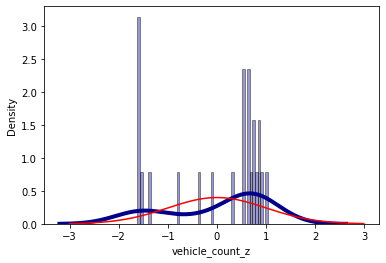

In [284]:
# getting the PDF for normalized rides on weekdays

print("For weekdays:\n\n")
dist_pdf(Taxi_weekday_grp['vehicle_count_z'])



In [285]:
# getting the PDF for normalized rides on weekends

Taxi_weekend = TaxiRidership_hour[TaxiRidership_hour['DOW'].isin([5,6])]

Taxi_weekend_grp = Taxi_weekend.groupby(['Hour']).agg({'vehicle_count':'sum'}) 

# standardize

standard(Taxi_weekend_grp,'vehicle_count','vehicle_count_z')

Taxi_weekend_grp.head()

,vehicle_count,vehicle_count_z
Hour,,
0,35241.0,-0.472415
1,6808.0,-1.248786
2,2451.0,-1.367755
3,807.0,-1.412645
4,813.0,-1.412481


For weekends:


Mean = -0.00
Std dev = 1.00


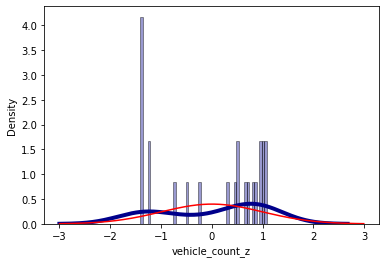

In [286]:
# getting the PDF for normalized rides on weekends

print("For weekends:\n\n")
dist_pdf(Taxi_weekend_grp['vehicle_count_z'])



In [287]:
# DO a t-test of each day with rest of the days

DOW = [0,1,2,3,4,5,6]
day_of_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
col = ['Rest of the days']
a=[]
p_values = pd.DataFrame()
for i in DOW:
    p_value = []
    p_value.append(stats.ttest_ind(TaxiRidership_hour[TaxiRidership_hour['DOW'].isin([i])]['vehicle_count_z'],
                TaxiRidership_hour[~TaxiRidership_hour['DOW'].isin([i])]['vehicle_count_z'])[1])
    a.append(p_value)    
a = np.array(a)

# create a 7x7 dataframe out of all p-values of different days comparison
p_values = pd.DataFrame(a,columns = col,index = day_of_week)
p_values

,Rest of the days
Monday,5.269848e-17
Tuesday,1.694463e-01
Wednesday,8.410123e-01
Thursday,2.741864e-08
Friday,1.340000e-04
Saturday,1.264401e-97
Sunday,1.822252e-01


In [288]:
# Function to determine if a particular hypothesis should be kept or rejected based on its p-value 
def true_false(x):
    y = ''
    if x == 1:
        y = '-'
    elif x < 0.05:
        y = "True"
    elif x >= 0.05:
        y = "False"
    return y

In [289]:
# Report hypothesis testing result in a  7×1  table, index name should be day of week (e.g. Monday), 
# values should be True or False (True for P < 0.05)

p_values.applymap(true_false)

,Rest of the days
Monday,True
Tuesday,False
Wednesday,False
Thursday,True
Friday,True
Saturday,True
Sunday,False


### Q3(10pts, 3 pts for locate the correct month, 7 pts for the figure.) .  Plot the timeline of the `vehicle_count` and `arrivals` for the month having the highest taxi ridership (the sum of vehicle count in the whole month). As `arrivals` and `vehicle_count` have different scales, standardize each dataset first.

In [290]:
# Get the month with most vehicle count

flight_and_taxi['month'] = pd.DatetimeIndex(flight_and_taxi.Date).month
flight_and_taxi_highest = flight_and_taxi[['month','vehicle_count']].groupby(by = 'month',as_index = False).sum().nlargest(1,'vehicle_count')
flight_and_taxi_highest.head()

,month,vehicle_count
9,10,507190.0


In [291]:
# standardize the dataset

standard(flight_and_taxi,'vehicle_count','vehicle_count_z')
standard(flight_and_taxi,'arrivals','arrivals_z')

flight_and_taxi.head(5)

,Date,arrivals,Hour,DOW,day,vehicle_count,lag_1,lag_2,lag_3,lag_4,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,month,vehicle_count_z,arrivals_z
0,2018-01-01 00:00:00,3,0,0,0,142.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.057751,-1.176750
1,2018-01-01 01:00:00,0,1,0,0,23.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.321100,-1.401769
2,2018-01-01 02:00:00,1,2,0,0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.367574,-1.326763
3,2018-01-01 03:00:00,0,3,0,0,1.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.369787,-1.401769
4,2018-01-01 04:00:00,0,4,0,0,13.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.343231,-1.401769


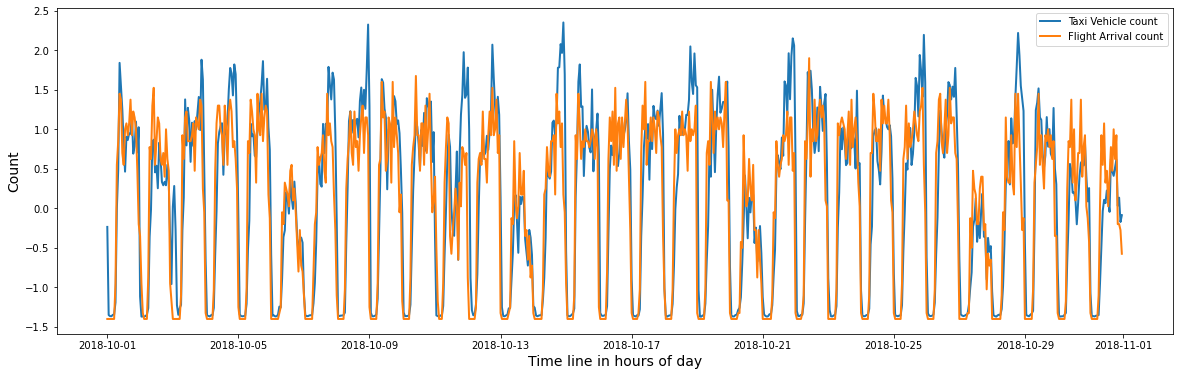

In [292]:
# Plotting timeline of flight arrival and vehicle count for the month with most vehicle count

flight_and_taxi_high_month = flight_and_taxi[flight_and_taxi['month'].isin(flight_and_taxi_highest.month)][['Date','vehicle_count_z','arrivals_z']]

plt.figure(figsize=(20, 6))
plt.plot(flight_and_taxi_high_month.Date, flight_and_taxi_high_month['vehicle_count_z'],label = 'Taxi Vehicle count',lw=2)
plt.plot(flight_and_taxi_high_month.Date, flight_and_taxi_high_month['arrivals_z'],label = 'Flight Arrival count',lw=2)

plt.xlabel("Time line in hours of day",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.legend()
plt.show()

## Task 4: Build Linear Regression Model of FHV and taxi ridership vs Arrivals data

### Q1 (3pts). split the data into training, validation and test samples (first 90 days for training, next 180 for validation, last 90 for test)


In [293]:
flight_and_taxi.head()

,Date,arrivals,Hour,DOW,day,vehicle_count,lag_1,lag_2,lag_3,lag_4,...,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,month,vehicle_count_z,arrivals_z
0,2018-01-01 00:00:00,3,0,0,0,142.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.057751,-1.176750
1,2018-01-01 01:00:00,0,1,0,0,23.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.321100,-1.401769
2,2018-01-01 02:00:00,1,2,0,0,2.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.367574,-1.326763
3,2018-01-01 03:00:00,0,3,0,0,1.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.369787,-1.401769
4,2018-01-01 04:00:00,0,4,0,0,13.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-1.343231,-1.401769


In [294]:
# Splitting the data into training, validation and test samples

f_t_Train=flight_and_taxi[flight_and_taxi['day'] < 90] 
f_t_Valid=flight_and_taxi[(flight_and_taxi['day'] > 89) & (flight_and_taxi['day'] < 270)] 
f_t_Test=flight_and_taxi[(flight_and_taxi['day'] > 274) & (flight_and_taxi['day'] < 365)] 


len(f_t_Train.day.unique()),len(f_t_Valid.day.unique()),len(f_t_Test.day.unique())

(90, 180, 90)

### Q2 (10pts, 6 pts for modeling, 2 pts for the confidence interval, 2 pts for the figure.). 

Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using `arrivals` as a sole predictor for `vehicle_count`. Check p-value for arrival. What does it indicate? Report the 99% confidence interval for arrival's coefficient. Scatter plot for taxi ridership and flight arrival, include the predictive line from linear regression report.

In [295]:
# Build an OLS model with intercept (you may want to use smf.ols) over the training dataset using arrivals as a sole 
# predictor for vehicle_count

lm = smf.ols(formula = 'vehicle_count~arrivals', data = f_t_Train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     5657.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:55:44   Log-Likelihood:                -14690.
No. Observations:                2160   AIC:                         2.938e+04
Df Residuals:                    2158   BIC:                         2.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.8315      7.772      9.757      0.0

#### Q> Check p-value for arrival. What does it indicate?

#### The p-value is <0.05 indicating that arrivals is a significant regressor for vehicle count

In [296]:
# 99% confidence interval for arrival's coefficient
lm.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,55.794760,95.868142
arrivals,25.382394,27.184322


In [297]:
f_t_Train['pred_vehicle_cnt']=lm.predict()

/tmp/ipykernel_50/2094329408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_t_Train['pred_vehicle_cnt']=lm.predict()


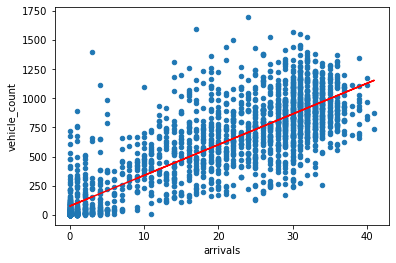

In [298]:
# Scatter plot for taxi ridership and flight arrival, include the predictive line from linear regression report.

fig, ax = plt.subplots() #get axis to plot on
f_t_Train.plot(ax=ax,kind='scatter',x='arrivals', y='vehicle_count') #show the data
ax.plot(f_t_Train['arrivals'],f_t_Train['pred_vehicle_cnt'],'r-'); #show the regression line

### Q3 (8pts): Consider Impact of immediate history of arrivals
by adding time lags - add all 12 lag variables into the regression above

There is always some delay between passengers arrival and departure (e.g. passing customs, picking up luggage, etc). `vehicle_count` might be more related to historical values of flight arrivals (lag) rather than immediate `arrivals`. Engineer a formula with all the following variables and run the regression:
* arrival, lag1, ..., lagN: that happens 1hr, ..., N=12 hr ahead.
Which of the variables have a statistically significant impact according to p-values?


In [299]:
#create a formulae including all the lags for multi-variate regression
formula='vehicle_count~arrivals+'+'+'.join(['lag_%d'%p for p in range(1,13)]); formula

'vehicle_count~arrivals+lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8+lag_9+lag_10+lag_11+lag_12'

In [300]:
# run the regression:

lm2 = smf.ols(formula=formula, data = f_t_Train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     1012.
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:55:45   Log-Likelihood:                -13957.
No. Observations:                2160   AIC:                         2.794e+04
Df Residuals:                    2146   BIC:                         2.802e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -51.0989      9.390     -5.442      0.0

#### Q> Which of the variables have a statistically significant impact according to p-values?

#### Ans: Variables "arrivals", "lag1","lag2","lag3","lag9","lag12" have a statistically significant impact according to p-values (p value < 0.05)

### Q4(5pt): Incorporate Temporal Patterns 

adding categorical variables for day of week and hour of the day.

From the visualization in task1Q3, you may see that both - taxi ridership as well as arrivals follow a somewhat periodic temporal pattern. Intuitively, this is true for most traffic flows following daily rhythms including rush hours, and also varying over the course of the week. Usually, we add dummy/categorical variables (Boolean variable: 1 for True and 0 for False) to encapsulate people's traveling patterns during different time periods.

Note that it would not make sense to add hour and dow as regular regressors as we can't anticipate their linear numeric impact. Instead, the expression `C(.)` or `pd.get_dummies` could be used in the regression formulae in order to treat those variables as categorical adding corresponding dummy variables to account for their possible discrete values. 

Perform the regression of `vehicle_count` ridership against `arrivals`, lags, and temporal categorical variables.

In [301]:
# adding categorical variables for day of week and hour of the day for main data
flight_and_taxi1 = pd.get_dummies(flight_and_taxi, columns=['DOW','Hour'], drop_first=False)

# create a column lag 0 for most recent arrival
flight_and_taxi1['lag_0'] = flight_and_taxi1['arrivals']

# Splittig the data into train, test and validation again 
# (with the same number of rows, just more columns for categorical variables)

f_t_Train1=flight_and_taxi1[flight_and_taxi1['day'] < 90] 
f_t_Valid1=flight_and_taxi1[(flight_and_taxi1['day'] > 89) & (flight_and_taxi1['day'] < 270)] 
f_t_Test1=flight_and_taxi1[(flight_and_taxi1['day'] > 274) & (flight_and_taxi1['day'] < 365)] 


len(f_t_Train1.day.unique()),len(f_t_Valid1.day.unique()),len(f_t_Test1.day.unique())


(90, 180, 90)

In [302]:
#create a formulae for multi-variate regression using list comprehension
formula2=formula+'+'+'+'.join(['Hour_%d'%p for p in range(0,24)]) + '+'+'+'.join(['DOW_%d'%p for p in range(0,7)]); formula2

'vehicle_count~arrivals+lag_1+lag_2+lag_3+lag_4+lag_5+lag_6+lag_7+lag_8+lag_9+lag_10+lag_11+lag_12+Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6'

In [303]:
# Perform the regression of vehicle_count ridership against arrivals, lags, and temporal categorical variables.

lm3 = smf.ols(formula=formula2, data = f_t_Train1).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:          vehicle_count   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     453.6
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:55:45   Log-Likelihood:                -13592.
No. Observations:                2160   AIC:                         2.727e+04
Df Residuals:                    2117   BIC:                         2.752e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0474      9.083      5.180      0.0

### Q5 (8pts, no penalty if students got different results, but no points if students failed to complete 12 models). Perform feature selection for lag variables
As you may see not all the lag variables have a statistically significant impact on the regression. Maybe some of them are not really relevant?
Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for training the above regression over the training sample, report and plot the out-of-sample R2 over the validation sample as the function of m and pick the m which maximizes it. Evaluate the final regression over the test sample.

In [304]:
# create a new formula 

formula3='vehicle_count~'+'+'.join(['Hour_%d'%p for p in range(0,24)]) + '+'+'+'.join(['DOW_%d'%p for p in range(0,7)]); formula3

'vehicle_count~Hour_0+Hour_1+Hour_2+Hour_3+Hour_4+Hour_5+Hour_6+Hour_7+Hour_8+Hour_9+Hour_10+Hour_11+Hour_12+Hour_13+Hour_14+Hour_15+Hour_16+Hour_17+Hour_18+Hour_19+Hour_20+Hour_21+Hour_22+Hour_23+DOW_0+DOW_1+DOW_2+DOW_3+DOW_4+DOW_5+DOW_6'

In [305]:
# Try different amounts of lag variables m=0,1,...,12 (include m most recent arrival volumes/lags) using a loop for 
# training the above regression over the training sample

TrainR2=[0]*14
ValidR2=[0]*14
lm=[0]*14
for M in range(1,14):
    formula=formula3 +'+'+'+'.join(['lag_%d'%p for p in range(0,M)]);
#     print(formula),print(M)
    lm[M] = smf.ols(formula=formula, data = f_t_Train1).fit()
    f_t_Valid1['pred_v_count']=lm[M].predict(f_t_Valid1)
    ValidR2[M]=1-((f_t_Valid1['pred_v_count']-f_t_Valid1['vehicle_count'])**2).sum()/((f_t_Valid1['vehicle_count']-f_t_Valid1['vehicle_count'].mean())**2).sum()
    TrainR2[M]=lm[M].rsquared

/tmp/ipykernel_50/71500012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_t_Valid1['pred_v_count']=lm[M].predict(f_t_Valid1)


In [306]:
ValidR2

[0,
 0.8239650449897558,
 0.8542058457567372,
 0.8559374026117588,
 0.8550867493212218,
 0.8550379172595651,
 0.8548511112303019,
 0.8548444694717993,
 0.8549507536522929,
 0.8551992567234732,
 0.8558887340866832,
 0.8555378462458483,
 0.8556566209890745,
 0.8555752522382305]

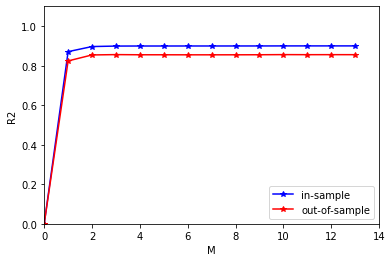

In [307]:
# report and plot the out-of-sample R2 over the validation sample as the function of m

plt.plot(range(0,14),TrainR2[:],'b-*',label='in-sample')
plt.plot(range(0,14),ValidR2[:],'r-*',label='out-of-sample')
plt.xlabel('M')
plt.ylabel('R2')
plt.ylim(0,1.1)
plt.xlim(0,14)
plt.legend(loc='lower right')

In [308]:
# pick the m which maximizes it

M=np.argmax(ValidR2); M

3

In [309]:
lm[M].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          vehicle_count   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     592.3
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:55:48   Log-Likelihood:                -13602.
No. Observations:                2160   AIC:                         2.727e+04
Df Residuals:                    2127   BIC:                         2.746e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7210      7.729      7.856      0.000      45.563      75.879
Hour_0        -9.9634     16.275     -0.612      0.540     -41.880      21.953
Hour_1      -128.5334     16.812     -7.645      0.000    -161.503     -95.564
Hour_2       -81.2410     15.800     -5.142      0.000    -112.226     -50.256
Hour_3       -68.6150     15.971     -4.296      0.000     -99.935     -37.295
Hour_4       -63.3665     16.014     -3.957      0.000     -94.771     -31.962
Hour_5       -61.0491     16.024     -3.810      0.000     -92.474     -29.624
Hour_6       -64.5007     15.893     -4.058      0.000     -95.668     -33.333
Hour_7       -64.7853     17.965     -3.606      0.000    -100.017     -29.554
Hour_8       -91.6217     17.998     -5.091      0.000    -126.917     -56.326
Hour_9       -72.2836     14.402     -5.019      0.000    -100.527     -44.041
Hour_10      -24.3801     14.831     -1.644      0.100     -53.466       4.705
Hour_11      -72.3911     14.813     -4.887      0.000    -101.440     -43.342
Hour_12      -41.6011     14.794     -2.812      0.005     -70.612     -12.590
Hour_13      -63.8236     14.201     -4.494      0.000     -91.673     -35.974
Hour_14      -28.9177     14.381     -2.011      0.044     -57.119      -0.716
Hour_15        0.0703     14.498      0.005      0.996     -28.362      28.503
Hour_16       37.0595     14.598      2.539      0.011       8.432      65.687
Hour_17       68.8042     14.598      4.713      0.000      40.176      97.432
Hour_18       82.0094     14.599      5.618      0.000      53.380     110.639
Hour_19      108.0394     14.504      7.449      0.000      79.597     136.482
Hour_20       69.5774     14.437      4.819      0.000      41.265      97.889
Hour_21      220.9320     14.308     15.441      0.000     192.872     248.992
Hour_22      184.2769     14.422     12.778      0.000     155.994     212.559
Hour_23      227.0251     14.517     15.639      0.000     198.557     255.494
DOW_0         54.6848      7.375      7.414      0.000      40.221      69.149
DOW_1        -16.0415      7.324     -2.190      0.029     -30.403      -1.679
DOW_2        -39.8394      6.997     -5.694      0.000     -53.561     -26.118
DOW_3         31.9890      7.223      4.429      0.000      17.825      46.153
DOW_4         -1.4481      7.156     -0.202      0.840     -15.482      12.586
DOW_5        -23.7646      7.328     -3.243      0.001     -38.135      -9.394
DOW_6         55.1408      7.228      7.628      0.000      40.965      69.316
lag_0         10.2869      0.638     16.134      0.000       9.037      11.537
lag_1         11.7615      0.691     17.018      0.000      10.406      13.117
lag_2          4.4895      0.628      7.148      0.000       3.258       5.721
==============================================================================
Om

In [310]:
# Evaluate the final regression over the test sample.

f_t_Test1['pred_v_count']=lm[M].predict(f_t_Test1)
TestR2=1-((f_t_Test1['pred_v_count']-f_t_Test1['vehicle_count'])**2).sum()/((f_t_Test1['vehicle_count']-f_t_Test1['vehicle_count'].mean())**2).sum()

print("R2 of the model on test sample:",TestR2)

R2 of the model on test sample: 0.8183264204908609


/tmp/ipykernel_50/3021036838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_t_Test1['pred_v_count']=lm[M].predict(f_t_Test1)


### Q6 (9pts, 3 pts for each figure). Visualize temporal patterns and lag impacts through bar plots
For the best regression above, visualize:
- bar plot of hour vs its impact coefficient
- bar plot of day of the week vs its impact coefficient
- bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)

In [311]:
coeff = lm[M].params
# coeff = pd.Series(coeff)
coeff = pd.DataFrame(coeff,columns = ['Impact Coefficient'])
coeff.reset_index(inplace = True)
coeff['Impact Coefficient'] = coeff['Impact Coefficient'].astype('float')

coeff.head(5)


,index,Impact Coefficient
0,Intercept,60.721017
1,Hour_0,-9.963362
2,Hour_1,-128.533358
3,Hour_2,-81.241002
4,Hour_3,-68.614958


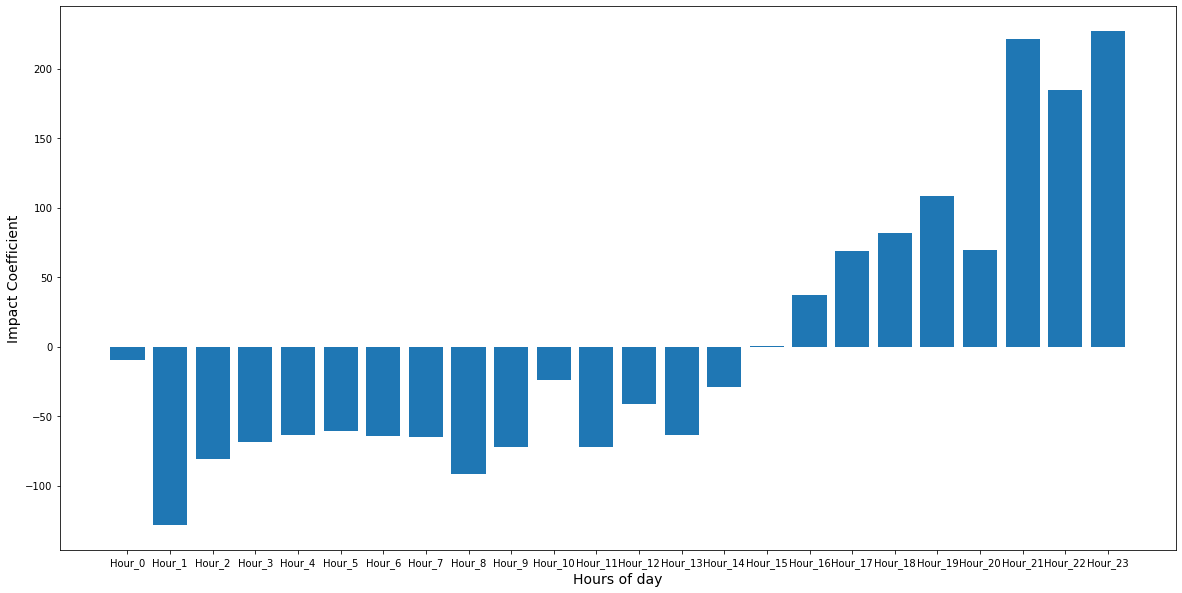

In [312]:
# bar plot of hour vs its impact coefficient

plt.figure(figsize=(20, 10))
plt.bar(coeff[coeff['index'].str.slice(0, 4) == 'Hour']['index'], coeff[coeff['index'].str.slice(0, 4) == 'Hour']['Impact Coefficient'])
plt.xlabel('Hours of day',fontsize = 14)
plt.ylabel('Impact Coefficient',fontsize = 14)
plt.show()


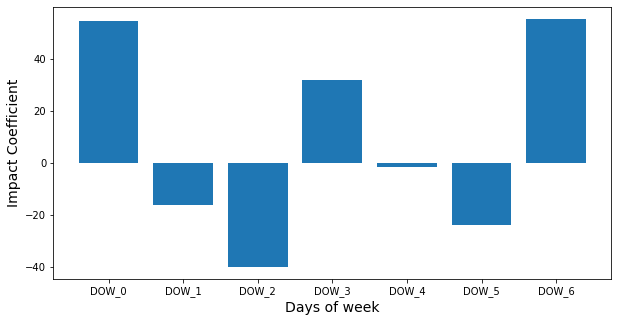

In [313]:
# bar plot of day of the week vs its impact coefficient


plt.figure(figsize=(10, 5))
plt.bar(coeff[coeff['index'].str.slice(0, 3) == 'DOW']['index'], coeff[coeff['index'].str.slice(0, 3) == 'DOW']['Impact Coefficient'])
plt.xlabel('Days of week',fontsize = 14)
plt.ylabel('Impact Coefficient',fontsize = 14)
plt.show()


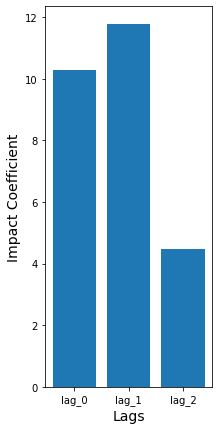

In [314]:
# bar plot of the lag (0 for immediate arrivals, 1,2,... for lags)


plt.figure(figsize=(3, 7))
plt.bar(coeff[coeff['index'].str.slice(0, 3) == 'lag']['index'], coeff[coeff['index'].str.slice(0, 3) == 'lag']['Impact Coefficient'])
plt.xlabel('Lags',fontsize = 14)
plt.ylabel('Impact Coefficient',fontsize = 14)
plt.show()


## Task 5. Cluster the days of the year based on the relative timeline of their taxi departures from the airport

### Q1 (3pts). From the entire `dataset`, create a dataframe with days as rows, hours as columns, and taxi ridership as values (feel free to use pd.pivot_table). Normalize each row by the total daily ridership

In [315]:
TaxiRidership.head()

,DOLocationID,Date,vehicle_count,DOW,Hour,day
0,1,2018-01-01,0.0,0,0,0
1,2,2018-01-01,0.0,0,0,0
2,3,2018-01-01,0.0,0,0,0
3,4,2018-01-01,0.0,0,0,0
4,5,2018-01-01,0.0,0,0,0


In [316]:
# From the entire dataset, create a dataframe with days as rows, hours as columns, and taxi ridership as values

TaxiRidership_pvot = TaxiRidership.pivot_table(index = 'day',columns = 'Hour',values = 'vehicle_count',aggfunc='sum')

TaxiRidership_pvot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,142.0,23.0,2.0,1.0,13.0,13.0,15.0,46.0,248.0,443.0,...,765.0,865.0,776.0,1182.0,804.0,765.0,744.0,1025.0,1196.0,1079.0
1,791.0,50.0,28.0,2.0,5.0,16.0,24.0,301.0,550.0,1117.0,...,892.0,650.0,820.0,927.0,979.0,940.0,811.0,1048.0,1034.0,735.0
2,674.0,309.0,24.0,3.0,8.0,12.0,44.0,176.0,531.0,777.0,...,700.0,688.0,907.0,1011.0,871.0,713.0,507.0,480.0,566.0,301.0
3,295.0,11.0,2.0,1.0,10.0,15.0,43.0,31.0,32.0,29.0,...,68.0,80.0,40.0,45.0,29.0,28.0,21.0,32.0,37.0,72.0
4,387.0,164.0,29.0,15.0,7.0,14.0,36.0,92.0,89.0,232.0,...,591.0,679.0,723.0,883.0,882.0,950.0,894.0,1055.0,761.0,957.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,572.0,124.0,52.0,3.0,4.0,17.0,60.0,174.0,694.0,863.0,...,859.0,968.0,806.0,997.0,1108.0,1136.0,915.0,603.0,942.0,665.0
361,470.0,656.0,390.0,66.0,14.0,15.0,65.0,200.0,536.0,769.0,...,951.0,977.0,983.0,966.0,1075.0,1003.0,907.0,1167.0,1214.0,721.0
362,627.0,139.0,4.0,6.0,5.0,30.0,64.0,122.0,464.0,603.0,...,664.0,975.0,844.0,877.0,1026.0,954.0,1082.0,1048.0,710.0,765.0


In [317]:
# Normalize each row by the total daily ridership

TaxiRidership_norm=TaxiRidership_pvot.div(TaxiRidership_pvot.sum(axis=1), axis=0)
TaxiRidership_norm

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.060942,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.059794,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.057823,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.057239,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.051142,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.038981,0.008450,0.003544,0.000204,0.000273,0.001159,0.004089,0.011858,0.047295,0.058812,...,0.058539,0.065967,0.054927,0.067943,0.075508,0.077416,0.062355,0.041093,0.064195,0.045318
361,0.028664,0.040007,0.023785,0.004025,0.000854,0.000915,0.003964,0.012197,0.032689,0.046899,...,0.057998,0.059584,0.059950,0.058913,0.065561,0.061170,0.055315,0.071172,0.074038,0.043971
362,0.045037,0.009984,0.000287,0.000431,0.000359,0.002155,0.004597,0.008763,0.033329,0.043313,...,0.047694,0.070033,0.060623,0.062994,0.073696,0.068525,0.077719,0.075277,0.050998,0.054949


### Q2 (8pts, no penalty if students got different results, but no points if the silhoutte score from different clusters are missing). Try K-means with different numbers of clusters k=2..7, reporting average Silhouette score for each. Which k is the "optimal" from Silhouette's standpoint?

In [318]:
# Try K-means with different numbers of clusters k=2..7, reporting average Silhouette score for each

range_n_clusters = [2, 3, 4, 5,6,7]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(TaxiRidership_norm)
    #report average Silhouette score
    silhouette_avg = silhouette_score(TaxiRidership_norm, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.18929824985499946
For n_clusters =3, the average silhouette_score is :0.22324051576230952
For n_clusters =4, the average silhouette_score is :0.23329518409569264
For n_clusters =5, the average silhouette_score is :0.22514662772630314
For n_clusters =6, the average silhouette_score is :0.1760282734467835
For n_clusters =7, the average silhouette_score is :0.17725740332000373


##### Q> Which k is the "optimal" from Silhouette's standpoint?

#### Ans. 4 clusters are optimal from silhouette standpoint (highest average silouette score)

### Q3 (10pts, 3 pts for data processing, 7 for the pivot table). Perform K-means with the optimal k from above. Report the number of occurrences of each day of the week within each of the clusters. How would you interpret the clusters based on that? Visualize the aggregated hourly timeline over all the days within each cluster.
Create a dictionary of the cluster numbers corresponding to each day of the year, apply it adding a column "cluster" to the dataframe, and use pivot table with aggregation function `count` to collect the numbers above. Also, use the pivot table to collect total riders per hour of the day within each cluster for further visualization (after appropriate normalization by the grand total).

In [319]:
#  K means based on optimal clusters from above

km=KMeans(random_state=324,n_clusters=4) #look for 4 clusters; 
res=km.fit(TaxiRidership_norm) #train the model
clusters=res.labels_

In [320]:
#create a dictionary mapping day of year to cluster labels
clusters={TaxiRidership_norm.index[i]:clusters[i] for i in range(len(clusters))}
#create a dataframe

================================

#### Note: After clustering, I joined the clusters to the pivoted data (at daily level) instead of joining back to original data as I felt that was more efficient (and since it was not mentioned in question, but as a suggestion). So, I have simply grouped the data and normalized for Q4

================================

In [321]:
TaxiRidership_norm['Labels'] = TaxiRidership_norm.index.map(clusters)
TaxiRidership_norm.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
day,,,,,,,,,,,,,,,,,,,,,
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.068908,0.061818,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956,0
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.043572,0.054967,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269,1
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.056831,0.074922,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864,3
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.067340,0.033670,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606,2
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.058757,0.062565,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814,0


In [322]:
DOW = TaxiRidership[['day','DOW']].drop_duplicates()

TaxiRidership_norm = TaxiRidership_norm.merge(DOW, left_on = TaxiRidership_norm.index, right_on = 'day',how = 'left').drop('day',axis = 1)
TaxiRidership_norm.DOW.value_counts()

0    53
1    52
2    52
3    52
4    52
5    52
6    52
Name: DOW, dtype: int64

In [323]:
TaxiRidership_norm['dummy'] = 1
TaxiRidership_norm.head()


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,Labels,DOW,dummy
0,0.011312,0.001832,0.000159,0.000080,0.001036,0.001036,0.001195,0.003664,0.019756,0.035290,...,0.094161,0.064048,0.060942,0.059269,0.081654,0.095276,0.085956,0,0,1
1,0.053023,0.003352,0.001877,0.000134,0.000335,0.001073,0.001609,0.020177,0.036868,0.074876,...,0.062140,0.065625,0.063011,0.054364,0.070251,0.069312,0.049269,1,1,1
2,0.055675,0.025525,0.001982,0.000248,0.000661,0.000991,0.003635,0.014538,0.043863,0.064183,...,0.083512,0.071948,0.058896,0.041880,0.039650,0.046754,0.024864,3,2,1
3,0.248316,0.009259,0.001684,0.000842,0.008418,0.012626,0.036195,0.026094,0.026936,0.024411,...,0.037879,0.024411,0.023569,0.017677,0.026936,0.031145,0.060606,2,3,1
4,0.033489,0.014192,0.002510,0.001298,0.000606,0.001211,0.003115,0.007961,0.007702,0.020076,...,0.076411,0.076324,0.082208,0.077362,0.091295,0.065853,0.082814,0,4,1


In [324]:
# table of each day of the week within different clusters

TaxiRidership_norm.pivot_table(index = 'Labels',columns = 'DOW',values = 'dummy',aggfunc = 'count').fillna(0)

DOW,0,1,2,3,4,5,6
Labels,,,,,,,
0,6.0,4.0,4.0,15.0,6.0,1.0,49.0
1,37.0,42.0,41.0,30.0,33.0,2.0,3.0
2,7.0,6.0,5.0,6.0,11.0,9.0,0.0
3,3.0,0.0,2.0,1.0,2.0,40.0,0.0


#### Q> How would you interpret the clusters based on that?

1. Most of the weekdays fall into cluster 1 based on hourly vehicle counts
2. Cluster zero is primarily sundays and thursdays, and cluster 3 is mostly saturdays..indicating that these days follow a different hourly vehicular pattern than rest of the days
3. Cluster 2 has evenly distributed days of week except sundays, indicating that there are some days in the year which follow similar patterns inspite of them being different days of the week

In [325]:
# Visualize the aggregated hourly timeline over all the days within each cluster

# aggregate by cluster
TaxiRidership_cltr = TaxiRidership_norm.groupby(by = 'Labels').sum().drop(['DOW','dummy'], axis = 1)
# normalize

TaxiRidership_cltr = TaxiRidership_cltr.div(TaxiRidership_cltr.sum(axis=1), axis=0)

TaxiRidership_cltr.index = TaxiRidership_cltr.index.astype(str)
TaxiRidership_cltr

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Labels,,,,,,,,,,,,,,,,,,,,,
0,0.014680,0.001979,0.000483,0.000357,0.000451,0.000671,0.001366,0.008062,0.020969,0.034169,...,0.057947,0.061323,0.066503,0.071005,0.074147,0.075897,0.073716,0.081353,0.081245,0.078306
1,0.027425,0.003217,0.000973,0.000269,0.000389,0.000639,0.002508,0.023228,0.040936,0.058258,...,0.056181,0.058332,0.061892,0.060918,0.064231,0.065033,0.061429,0.068778,0.061760,0.056202
2,0.076715,0.030425,0.006999,0.001336,0.000999,0.001402,0.004081,0.018597,0.035699,0.047217,...,0.053613,0.053281,0.053573,0.056097,0.055548,0.058185,0.053117,0.059177,0.056273,0.057032
3,0.048034,0.006471,0.002120,0.000564,0.000864,0.001214,0.003355,0.008134,0.030735,0.047149,...,0.068371,0.073603,0.065585,0.075778,0.059048,0.051911,0.039912,0.051860,0.043137,0.052250


### Q4(4pts) visualize the hourly timeline for each cluster, and normalize by total riderships in the cluster.by total riderships in the cluster.

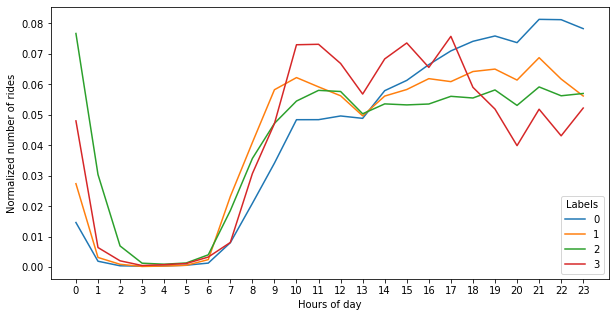

In [326]:
# Visualize
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

TaxiRidership_hr = TaxiRidership_cltr.transpose()
TaxiRidership_hr.plot(figsize=(10, 5))
plt.xticks(x)
plt.xlabel('Hours of day')
plt.ylabel('Normalized number of rides')
plt.show()